# Demonstrate Worst Case of RFM-Graphene


In [47]:
import math
import pandas as pd
import numpy as np

# Input
RAAIMT_list = [32, 64, 128, 256]
reset_interval = 2 # used in Graphene paper. 2 means, reset at every 2*tREFW

# DDR Constraints
tREFW = 32000000
tREFI = 3900
num_REF = 8192
tRC = 48.75
tRFC = 295

# Output
safe_MACs = {}

In [48]:
# Given "T", return "Safe_MAC"
def ARR_Graphene_MAC(_T):
  safe_MAC = 2*(reset_interval+1)*_T - 2*(reset_interval+1)
  return safe_MAC

# Given "T" and "RAAIMT", return "Safe_MAC"
def RFM_Graphene_MAC(_T,_RAAIMT): 
  num_ACT = (tREFW - num_REF*tRFC)/(tRC)

  # worst case where maximum number of rows simultaneously reach "T"
  safe_MAC = int(num_ACT/_T)*int(_RAAIMT) # number_of_rows * wait_time
  return safe_MAC

In [49]:
# ARR Graphene - single case
safe_MACs["Graphene"] = {}
for T in range(25,10000,25):
  safe_MACs["Graphene"][T] = ARR_Graphene_MAC(T)

# RFM Graphene - single case
for cur_RAAIMT in RAAIMT_list:
  safe_MACs["RFM"+str(cur_RAAIMT)] = {}
  for T in range(25,10000,25):
    safe_MACs["RFM"+str(cur_RAAIMT)][T] = RFM_Graphene_MAC(T,cur_RAAIMT)

# RFM Graphene - combined case w/ ARR Graphene
for cur_RAAIMT in RAAIMT_list:
  MIN = 100000000
  safe_MACs["Combined"+str(cur_RAAIMT)] = {}
  for T in range(25,10000,25):
    MAX = max(safe_MACs["Graphene"][T],safe_MACs["RFM"+str(cur_RAAIMT)][T])
    safe_MACs["Combined"+str(cur_RAAIMT)][T] = MAX

    if (MIN >= MAX):
      MIN = MAX


In [50]:
df = pd.DataFrame(safe_MACs)
pd.options.display.max_rows = 9999

(0.0, 8000.0)

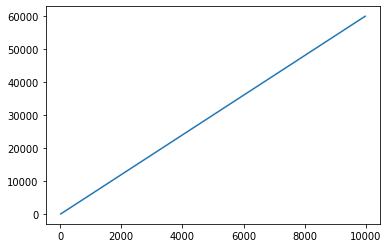

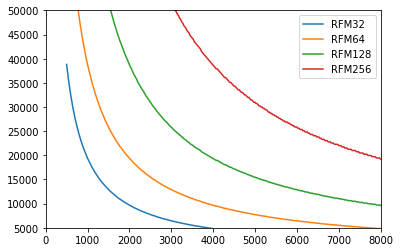

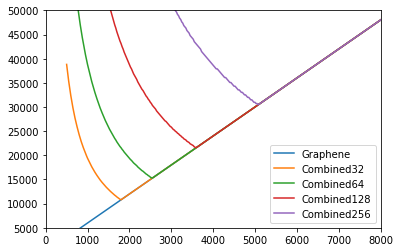

In [51]:
#
plt = df['Graphene'].plot()
plt.set_title("Original ARR-Graphene")

#
plt = df[df.columns[1:5]].loc[500:].plot()
plt.set_ylim([5000,50000])
plt.set_xlim([0,8000])
plt.set_title("Only Considers Concentrated Case")

#
plt = df[df.columns[np.r_[0,5:9]]].loc[500:].plot()
plt.set_ylim([5000,50000])
plt.set_xlim([0,8000])
plt.set_title("RFM-Graphene")